### Libraries

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

importing the train data set

In [212]:
train_df= pd.read_csv("train_storming_round.csv")
train_df.head()

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   455ca878         45         2/1/2021                9/1/2023   
1       2   c823ce77         48         4/1/2022                2/1/2024   
2       3   62154055         53         5/1/2020                9/1/2023   
3       4   c58bfa6e         44         7/1/2019                3/1/2022   
4       5   b1e5f770         20         9/1/2020                2/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   1/1/2023                             3                              6   
1   1/1/2023                             1                              4   
2   1/1/2023                             3                              5   
3   1/1/2023                             1                              0   
4   1/1/2023                             0                              6   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                              2               12  ...                  9   
1                             12               21  ...                 14   
2                              5               17  ...                 14   
3                             12               17  ...                 11   
4                             10               17  ...                 13   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             3                              4   
1                             4                              3   
2                             3                              7   
3                             2                              2   
4                             3                             10   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              8                15                 0   
1                             10                17                25   
2                             11                21                26   
3                              9                13                18   
4                              6                19                20   

   ANBP_value  net_income  number_of_policy_holders  \
0           0       93313                        30   
1     1071450      164804                         0   
2     1601210      426690                        84   
3      283230       47793                        39   
4     1957680      562239                        19   

   number_of_cash_payment_policies  
0                              162  
1                              175  
2                               78  
3                              144  
4                               40  

[5 rows x 23 columns]

basic Description check

In [213]:
print(f"Shape of the dataset: {train_df.shape}")
print(train_df.info())
train_df.describe()

Shape of the dataset: (15308, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           15308 non-null  int64 
 1   agent_code                       15308 non-null  object
 2   agent_age                        15308 non-null  int64 
 3   agent_join_month                 15308 non-null  object
 4   first_policy_sold_month          15308 non-null  object
 5   year_month                       15308 non-null  object
 6   unique_proposals_last_7_days     15308 non-null  int64 
 7   unique_proposals_last_15_days    15308 non-null  int64 
 8   unique_proposals_last_21_days    15308 non-null  int64 
 9   unique_proposal                  15308 non-null  int64 
 10  unique_quotations_last_7_days    15308 non-null  int64 
 11  unique_quotations_last_15_days   15308 non-null  int64 
 12

row_id     agent_age  unique_proposals_last_7_days  \
count  15308.000000  15308.000000                  15308.000000   
mean    7654.500000     40.585772                      1.491246   
std     4419.183296     11.688204                      1.119554   
min        1.000000     20.000000                      0.000000   
25%     3827.750000     31.000000                      0.000000   
50%     7654.500000     41.000000                      1.000000   
75%    11481.250000     51.000000                      2.000000   
max    15308.000000     60.000000                      3.000000   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        2.991116                      10.045728   
std                         2.001613                       6.037296   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   

       unique_proposal  unique_quotations_last_7_days  \
count     15308.000000                   15308.000000   
mean         17.516527                       1.989679   
std           6.616954                       1.420996   
min           1.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          23.000000                       3.000000   
max          34.000000                       4.000000   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                    15308.000000                    15308.000000   
mean                         2.996538                        4.469624   
std                          2.004386                        2.875329   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   

       unique_quotations  unique_customers_last_7_days  \
count       15308.000000                  15308.000000   
mean           13.922394                      2.995493   
std             4.663777                      1.644117   
min             1.000000                      0.000000   
25%            11.000000                      2.000000   
50%            14.000000                      3.000000   
75%            17.000000                      4.000000   
max            32.000000                      6.000000   

       unique_customers_last_15_days  unique_customers_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        4.997714                       7.500523   
std                         2.438918                       3.468597   
min                         0.000000                       0.000000   
25%                         3.000000                       5.000000   
50%                         5.000000                       8.000000   
75%                         7.000000                      10.000000   
max                        10.000000                      15.000000   

       unique_customers  new_policy_count    ANBP_value    net_income  \
count      15308.000000      15308.000000  1.530800e+04  1.530800e+04   
mean          15.493729         20.269990  1.025338e+06  2.280414e+05   
std            4.542321          9.541693  8.054989e+05  1.736671e+05   
min            1.000000          0.000000  0.000000e+00  1.160000e+03   
25%           12.000000         15.000000  3.473238e+05  9.282500e+04

changeing date data type into DATE type 

In [214]:
# Convert 'year_month' to datetime if needed
train_df['year_month'] = pd.to_datetime(train_df['year_month'], format='%m/%d/%Y')

# Convert 'agent_join_month' and 'first_policy_sold_month' to datetime (adjusting format if needed)
train_df['agent_join_month'] = pd.to_datetime(train_df['agent_join_month'], format='%m/%d/%Y')
train_df['first_policy_sold_month'] = pd.to_datetime(train_df['first_policy_sold_month'], format='%m/%d/%Y')

# Checking if the conversion is correct
print(train_df[['year_month', 'agent_join_month', 'first_policy_sold_month']].head())



  year_month agent_join_month first_policy_sold_month
0 2023-01-01       2021-02-01              2023-09-01
1 2023-01-01       2022-04-01              2024-02-01
2 2023-01-01       2020-05-01              2023-09-01
3 2023-01-01       2019-07-01              2022-03-01
4 2023-01-01       2020-09-01              2023-02-01


In [215]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   row_id                           15308 non-null  int64         
 1   agent_code                       15308 non-null  object        
 2   agent_age                        15308 non-null  int64         
 3   agent_join_month                 15308 non-null  datetime64[ns]
 4   first_policy_sold_month          15308 non-null  datetime64[ns]
 5   year_month                       15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days     15308 non-null  int64         
 7   unique_proposals_last_15_days    15308 non-null  int64         
 8   unique_proposals_last_21_days    15308 non-null  int64         
 9   unique_proposal                  15308 non-null  int64         
 10  unique_quotations_last_7_days    15308 non-null  int64    

checking Null values 

In [216]:
# Check for missing values
missing_data = train_df.isnull().sum()
missing_percentage = (missing_data / train_df.shape[0]) * 100
print(f"Missing Data Percentage:\n{missing_percentage}")


Missing Data Percentage:
row_id                             0.0
agent_code                         0.0
agent_age                          0.0
agent_join_month                   0.0
first_policy_sold_month            0.0
year_month                         0.0
unique_proposals_last_7_days       0.0
unique_proposals_last_15_days      0.0
unique_proposals_last_21_days      0.0
unique_proposal                    0.0
unique_quotations_last_7_days      0.0
unique_quotations_last_15_days     0.0
unique_quotations_last_21_days     0.0
unique_quotations                  0.0
unique_customers_last_7_days       0.0
unique_customers_last_15_days      0.0
unique_customers_last_21_days      0.0
unique_customers                   0.0
new_policy_count                   0.0
ANBP_value                         0.0
net_income                         0.0
number_of_policy_holders           0.0
number_of_cash_payment_policies    0.0
dtype: float64


visualizing Null values

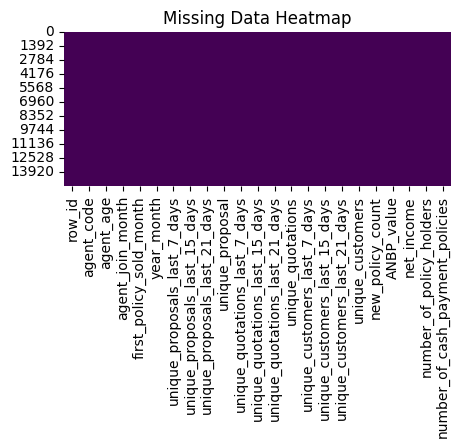

In [217]:
# Visualize missing data
plt.figure(figsize=(5, 2))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

getting all the unique values in each columns

In [218]:
# Check the number of unique values in each column
unique_values = train_df.nunique()

# Display the number of unique values for each column
print(unique_values)


row_id                             15308
agent_code                           905
agent_age                             41
agent_join_month                      64
first_policy_sold_month               28
year_month                            20
unique_proposals_last_7_days           4
unique_proposals_last_15_days          7
unique_proposals_last_21_days         21
unique_proposal                       34
unique_quotations_last_7_days          5
unique_quotations_last_15_days         7
unique_quotations_last_21_days        10
unique_quotations                     32
unique_customers_last_7_days           7
unique_customers_last_15_days         11
unique_customers_last_21_days         16
unique_customers                      31
new_policy_count                      42
ANBP_value                         13672
net_income                         15074
number_of_policy_holders              73
number_of_cash_payment_policies      188
dtype: int64


### Sales Trend Over Time

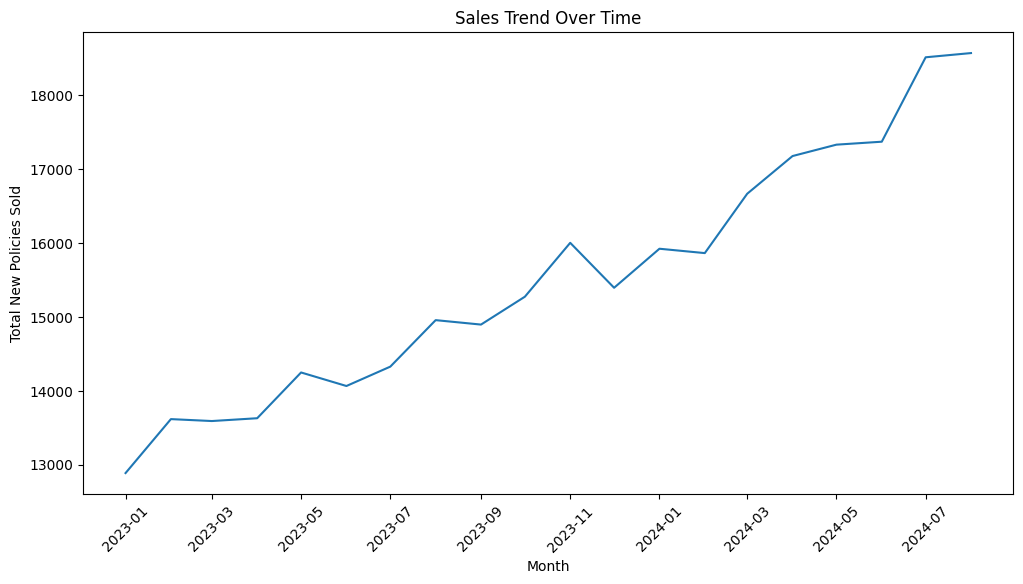

In [219]:
# Aggregating sales data by month
monthly_sales = train_df.groupby('year_month')['new_policy_count'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['new_policy_count'])
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total New Policies Sold')
plt.xticks(rotation=45)
plt.show()


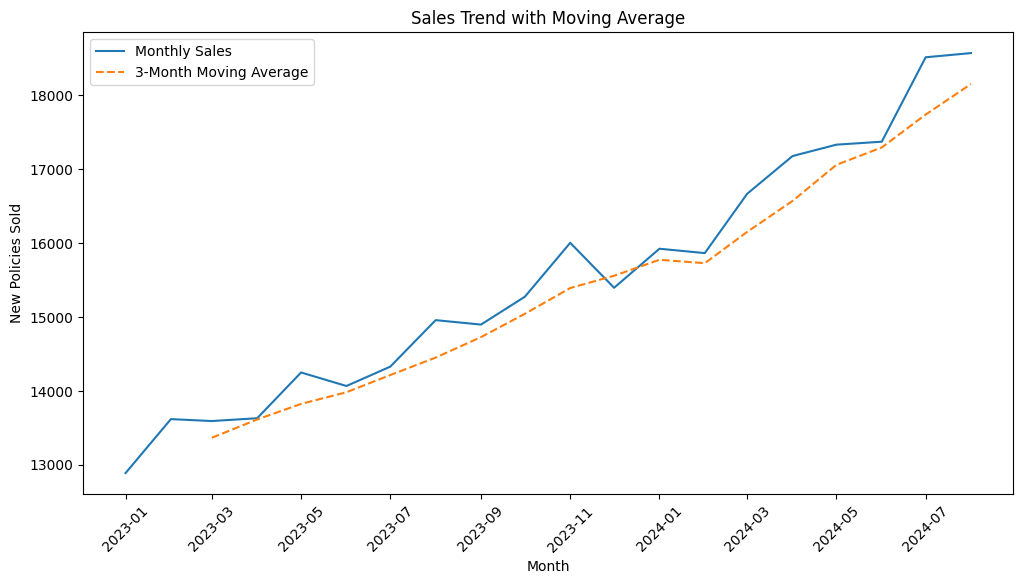

In [220]:
# Adding a moving average to smooth the sales trend
monthly_sales['moving_avg'] = monthly_sales['new_policy_count'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['new_policy_count'], label='Monthly Sales')
plt.plot(monthly_sales['year_month'], monthly_sales['moving_avg'], label='3-Month Moving Average', linestyle='--')
plt.title('Sales Trend with Moving Average')
plt.xlabel('Month')
plt.ylabel('New Policies Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [221]:
categorical_columns = [
    'agent_code',
    'agent_join_month',
    'first_policy_sold_month',
    'year_month'
]

numerical_columns = [
    'agent_age',
    'unique_proposals_last_7_days',
    'unique_proposals_last_15_days',
    'unique_proposals_last_21_days',
    'unique_proposal',
    'unique_quotations_last_7_days',
    'unique_quotations_last_15_days',
    'unique_quotations_last_21_days',
    'unique_quotations',
    'unique_customers_last_7_days',
    'unique_customers_last_15_days',
    'unique_customers_last_21_days',
    'unique_customers',
    'new_policy_count',
    'ANBP_value',
    'net_income',
    'number_of_policy_holders',
    'number_of_cash_payment_policies'
]


###  Univariate Analysis: Plot histograms for numerical features

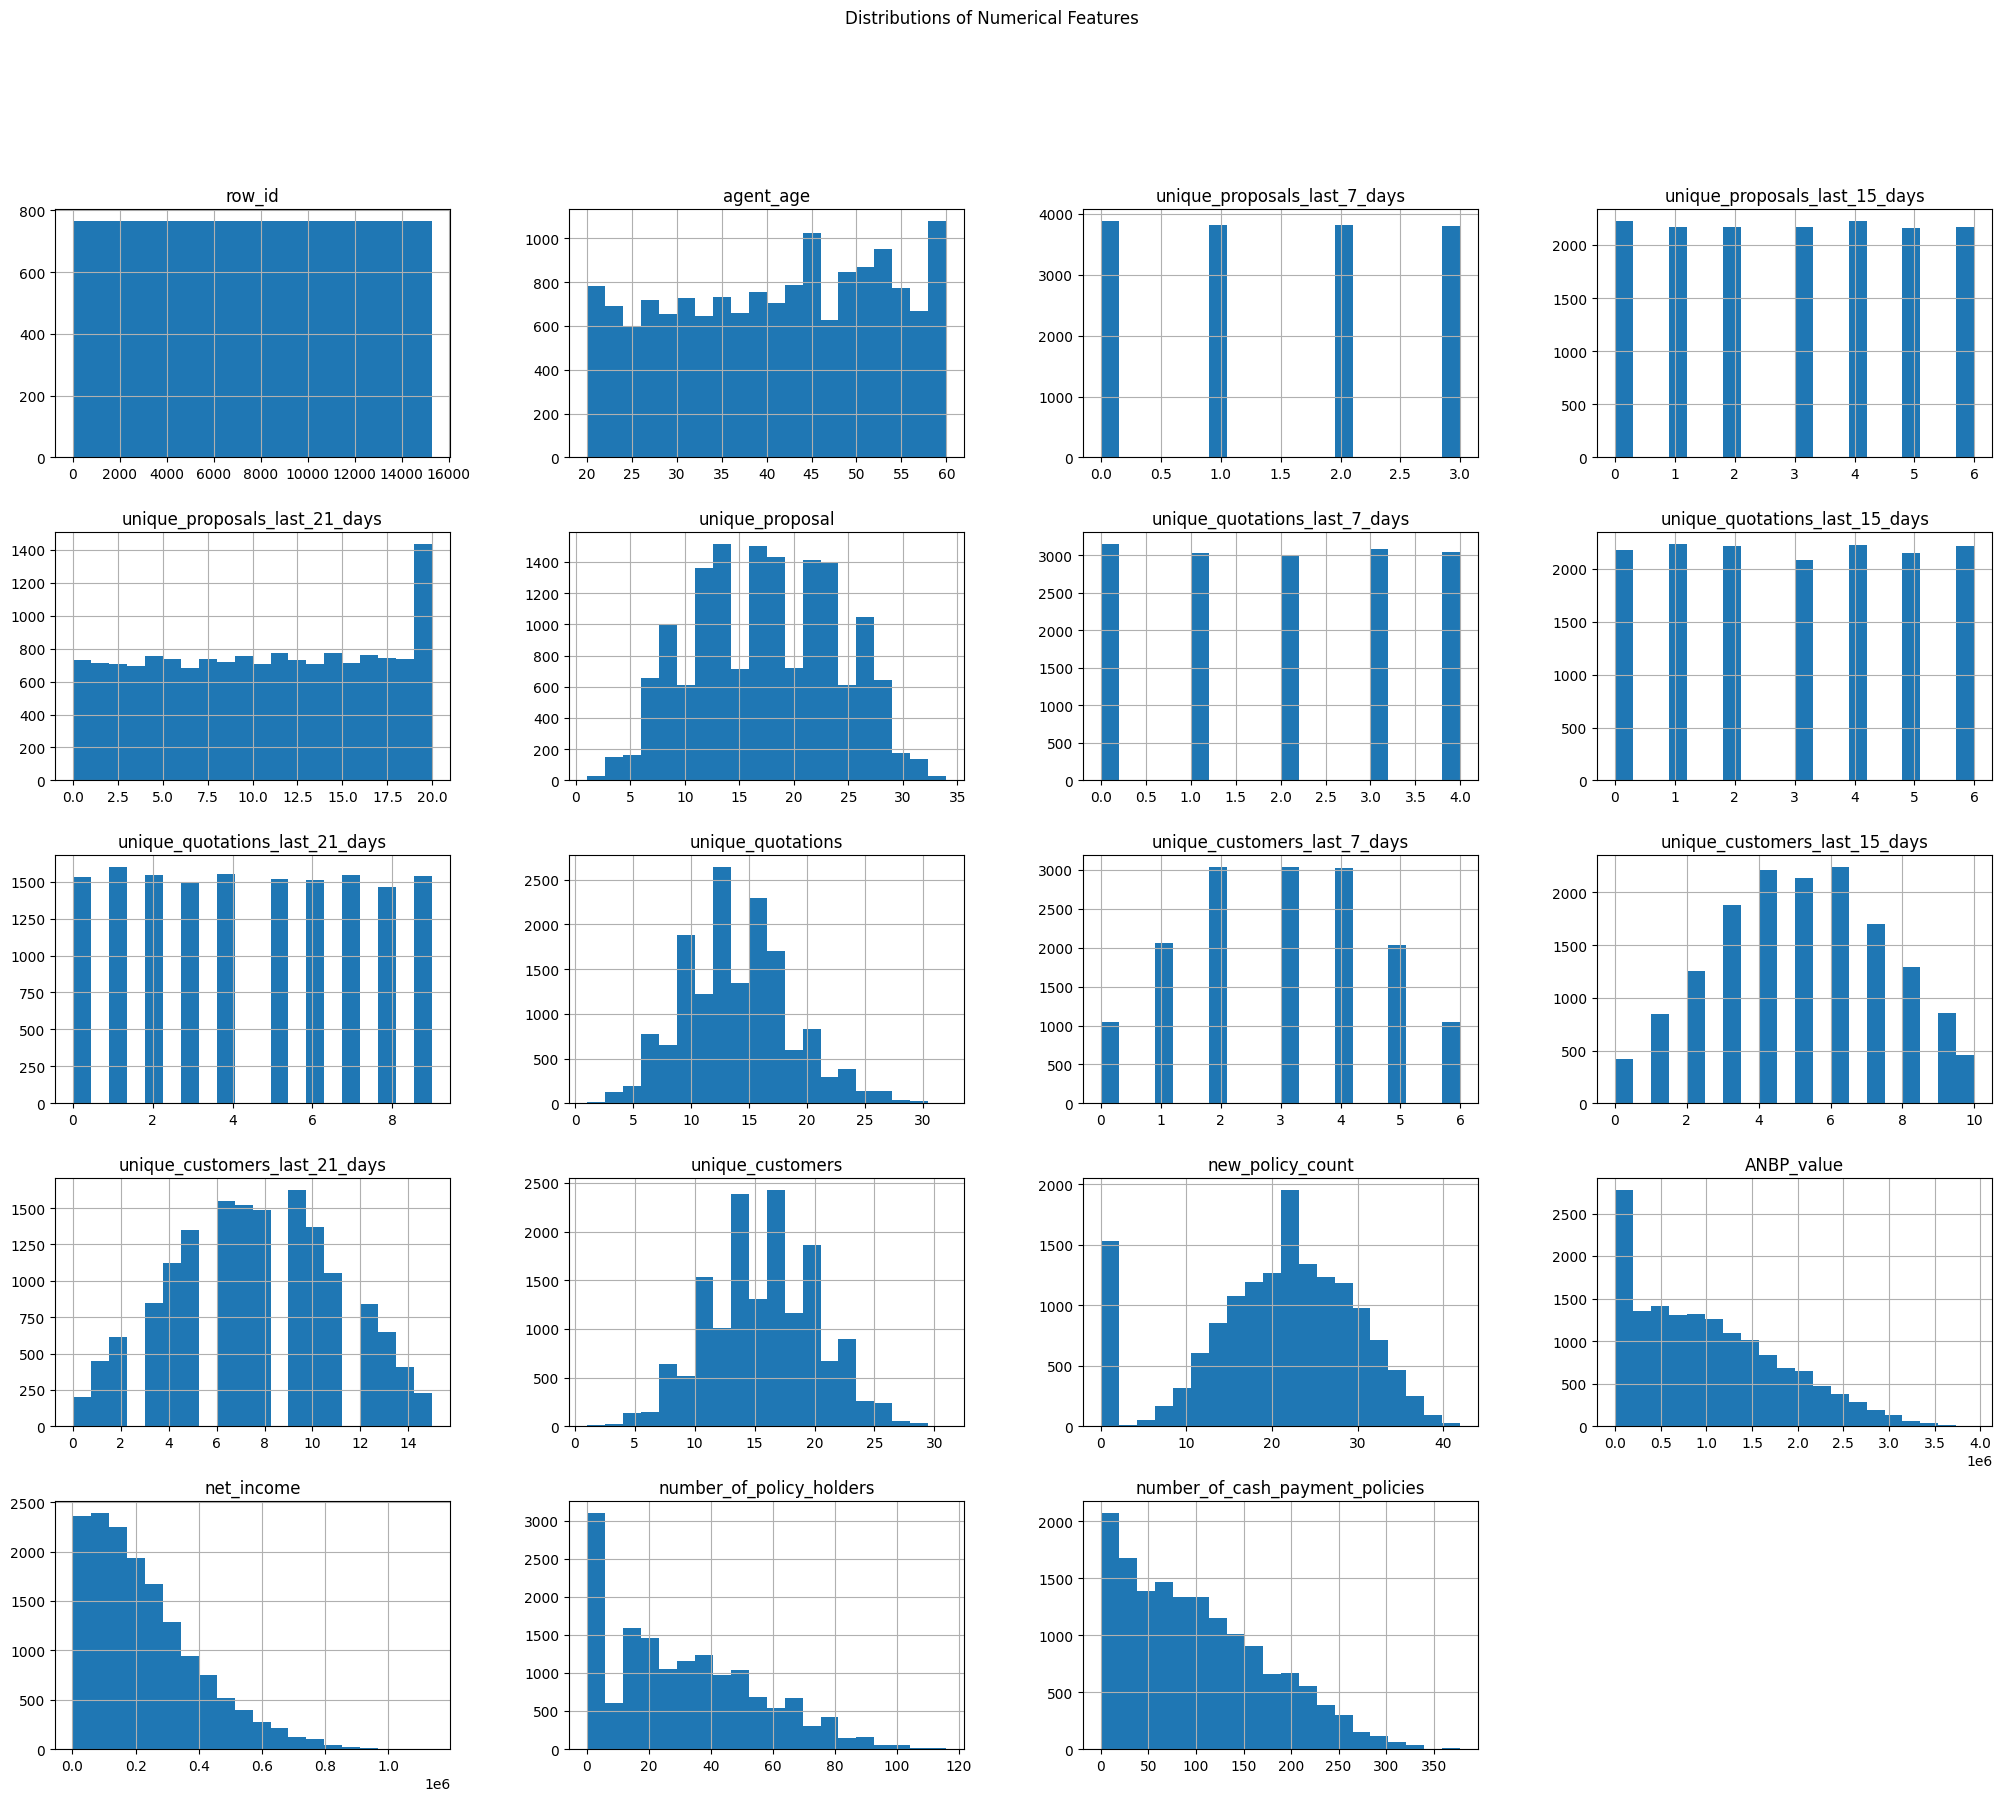

In [222]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_cols].hist(bins=20, figsize=(25, 20))
plt.suptitle("Distributions of Numerical Features")
plt.show()

### Added Logrithm for skwwed 4 numasrical columns

In [223]:
# import numpy as np

# # Log transformation for skewed columns
# train_df['ANBP_value'] = np.log1p(train_df['ANBP_value'])  # log(x+1) to avoid log(0)
# # train_df['net_income'] = np.log1p(train_df['net_income'])
# # train_df['number_of_policy_holders'] = np.log1p(train_df['number_of_policy_holders'])
# # train_df['number_of_cash_payment_policies'] = np.log1p(train_df['number_of_cash_payment_policies'])


In [224]:
# Check the distribution after transformation
# # train_df[['ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies']].hist(bins=20, figsize=(15, 10))
# train_df[['ANBP_value']].hist(bins=20, figsize=(15, 10))
# plt.suptitle("Distributions of Transformed Numerical Features")
# plt.show()

### BoxCox Tranformation applied for numarical columns

checked those 4 numarical columns with vaious of Transformation methods (log , squaroot , Boxcox) , we got best with BOxCox transfoaramation.

In [ ]:
# Box-Cox transformation (must be applied only on strictly positive values)
train_df['ANBP_value_boxcox_added'], _ = stats.boxcox(train_df['ANBP_value'] + 1)  # Adding 1 to avoid log(0)
train_df['net_income_boxcox_added'], _ = stats.boxcox(train_df['net_income'] + 1)
train_df['number_of_policy_holders_boxcox_added'], _ = stats.boxcox(train_df['number_of_policy_holders'] + 1)
train_df['number_of_cash_payment_policies_boxcox_added'], _ = stats.boxcox(train_df['number_of_cash_payment_policies'] + 1)



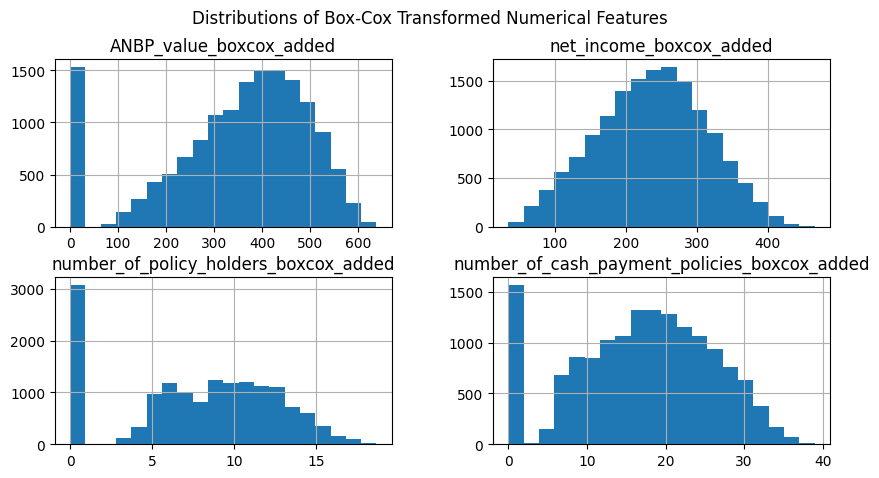

In [226]:
train_df[['ANBP_value_boxcox_added', 'net_income_boxcox_added', 'number_of_policy_holders_boxcox_added', 'number_of_cash_payment_policies_boxcox_added']].hist(bins=20, figsize=(10, 5))
# train_df[['ANBP_value_boxcox_added']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Box-Cox Transformed Numerical Features")
plt.show()

In [227]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   row_id                                        15308 non-null  int64         
 1   agent_code                                    15308 non-null  object        
 2   agent_age                                     15308 non-null  int64         
 3   agent_join_month                              15308 non-null  datetime64[ns]
 4   first_policy_sold_month                       15308 non-null  datetime64[ns]
 5   year_month                                    15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days                  15308 non-null  int64         
 7   unique_proposals_last_15_days                 15308 non-null  int64         
 8   unique_proposals_last_21_days                 15308 non-null  int6

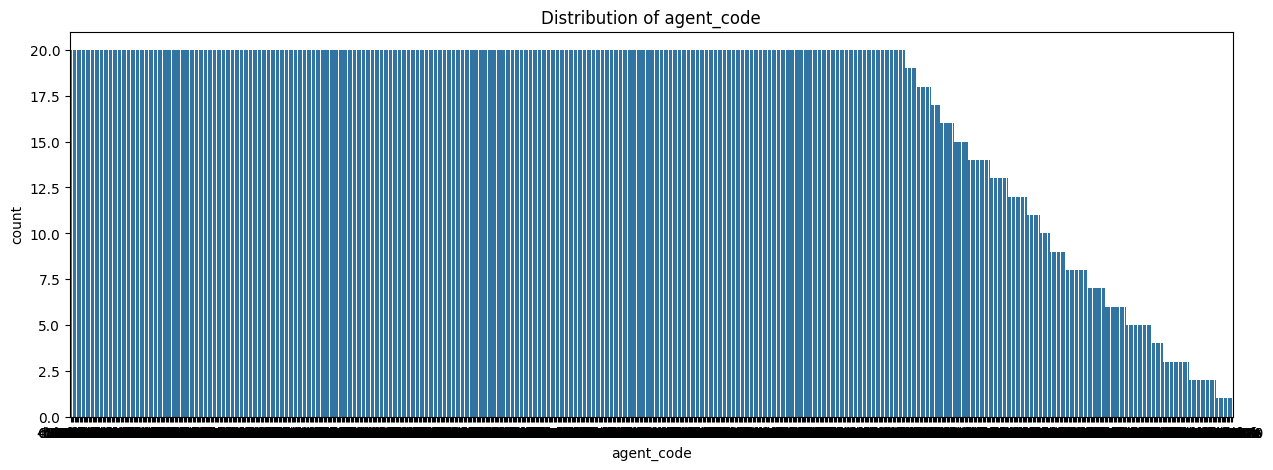

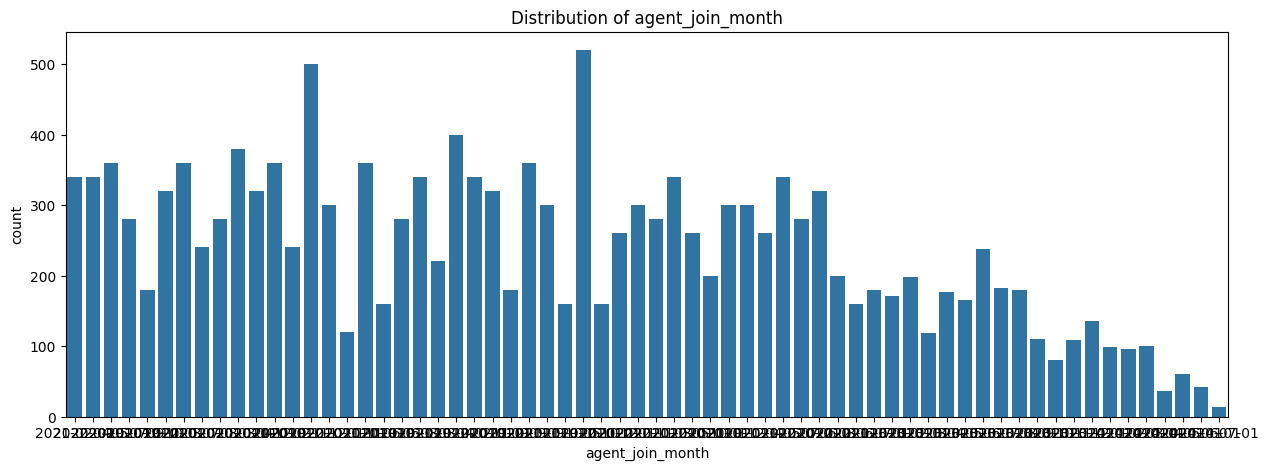

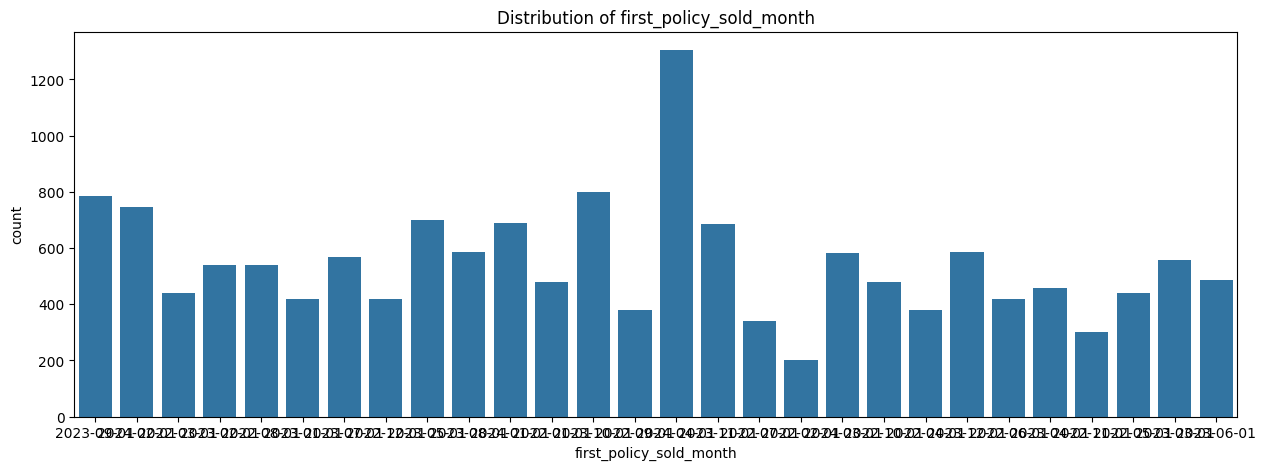

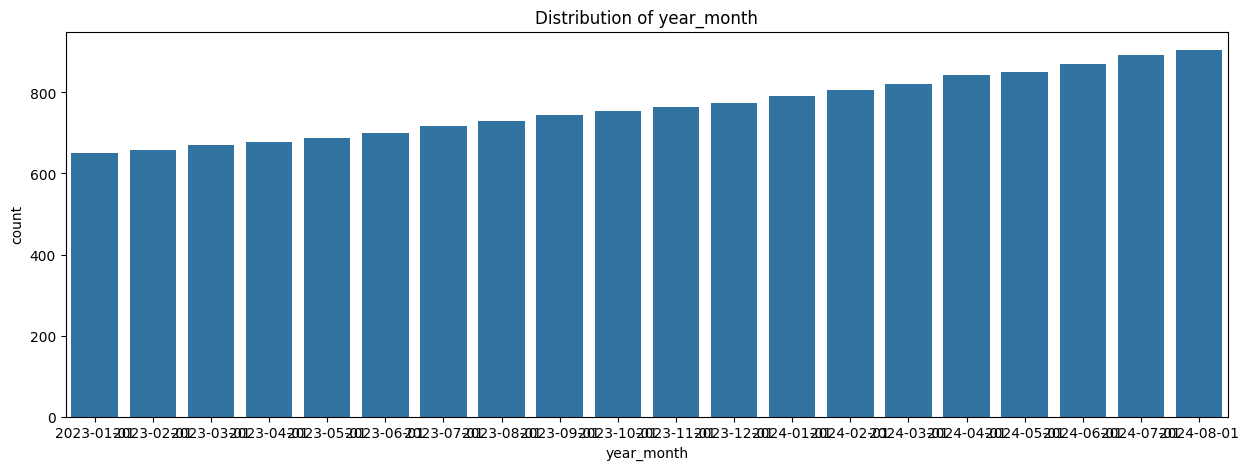

In [228]:
# Plot the distribution of categorical features
for col in categorical_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=train_df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


In [229]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   row_id                                        15308 non-null  int64         
 1   agent_code                                    15308 non-null  object        
 2   agent_age                                     15308 non-null  int64         
 3   agent_join_month                              15308 non-null  datetime64[ns]
 4   first_policy_sold_month                       15308 non-null  datetime64[ns]
 5   year_month                                    15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days                  15308 non-null  int64         
 7   unique_proposals_last_15_days                 15308 non-null  int64         
 8   unique_proposals_last_21_days                 15308 non-null  int6

### Now lets chaneg the Numarical column in order to New Box-Cox columns

In [230]:
categorical_columns = [
    'agent_code',
    'agent_join_month',
    'first_policy_sold_month',
    'year_month'
]

numerical_columns = [
    'agent_age',
    'unique_proposals_last_7_days',
    'unique_proposals_last_15_days',
    'unique_proposals_last_21_days',
    'unique_proposal',
    'unique_quotations_last_7_days',
    'unique_quotations_last_15_days',
    'unique_quotations_last_21_days',
    'unique_quotations',
    'unique_customers_last_7_days',
    'unique_customers_last_15_days',
    'unique_customers_last_21_days',
    'unique_customers',
    'new_policy_count',
    'ANBP_value_boxcox_added',
    'net_income_boxcox_added',
    'number_of_policy_holders_boxcox_added',
    'number_of_cash_payment_policies_boxcox_added'
]

## Check Outliers in each numaric columns

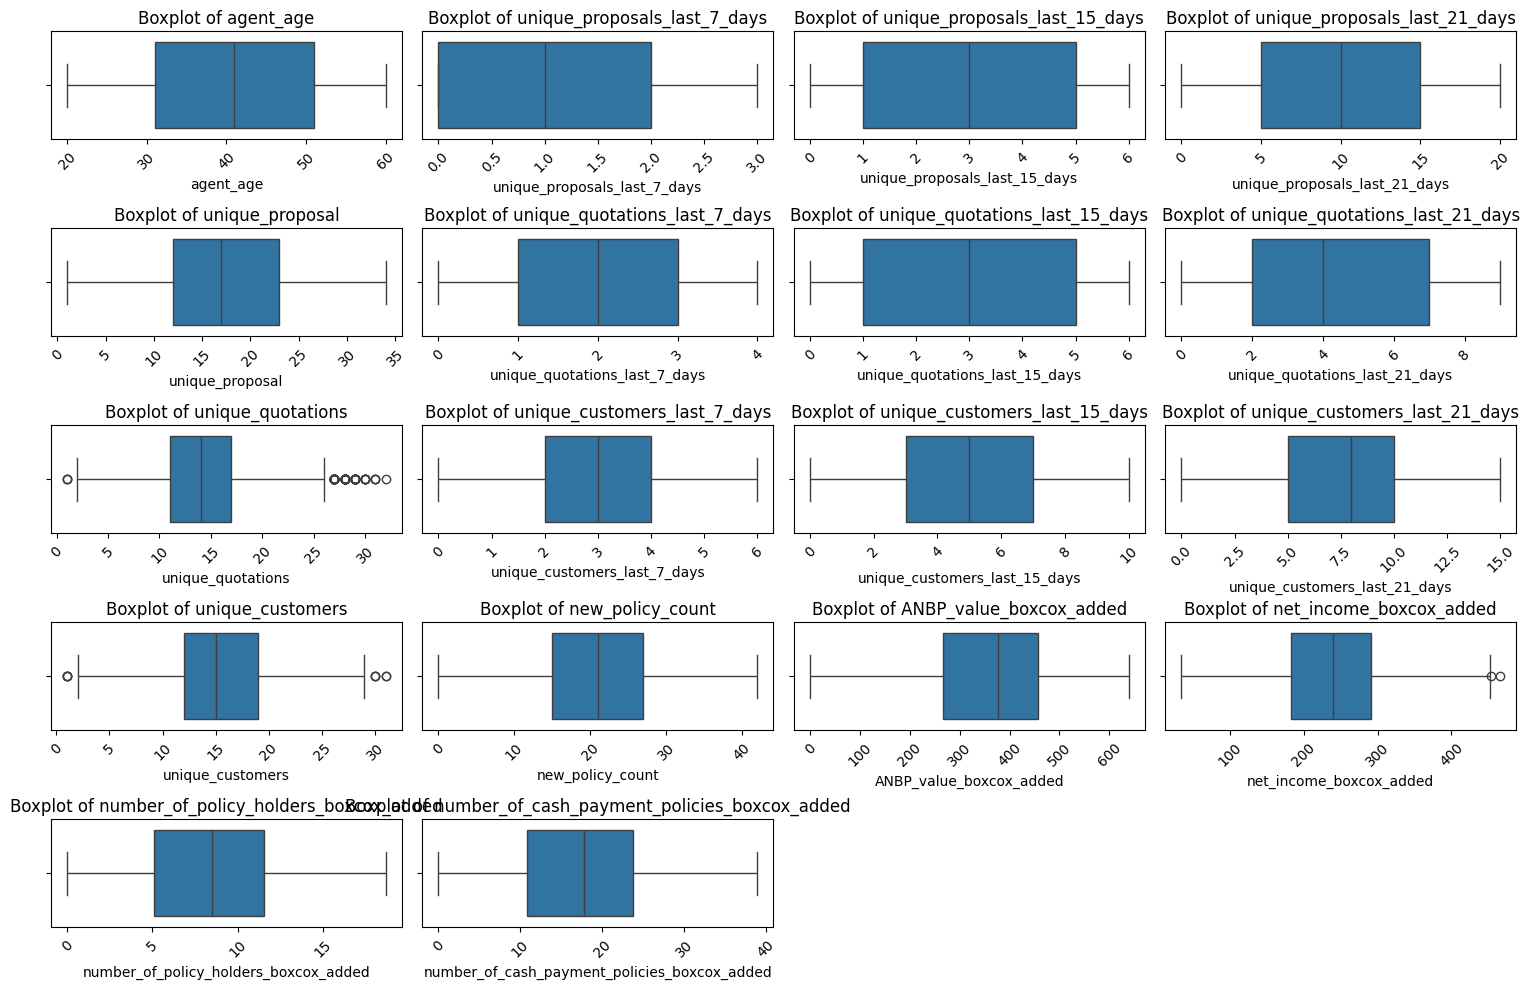

In [231]:
# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)  # Create a grid of 5x4 for the plots
    sns.boxplot(data=train_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

insted of removing , lets capped 

In [232]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)
    return df

# Apply capping to each column where outliers are suspected
for column in numerical_columns:
    train_df = cap_outliers(train_df, column)

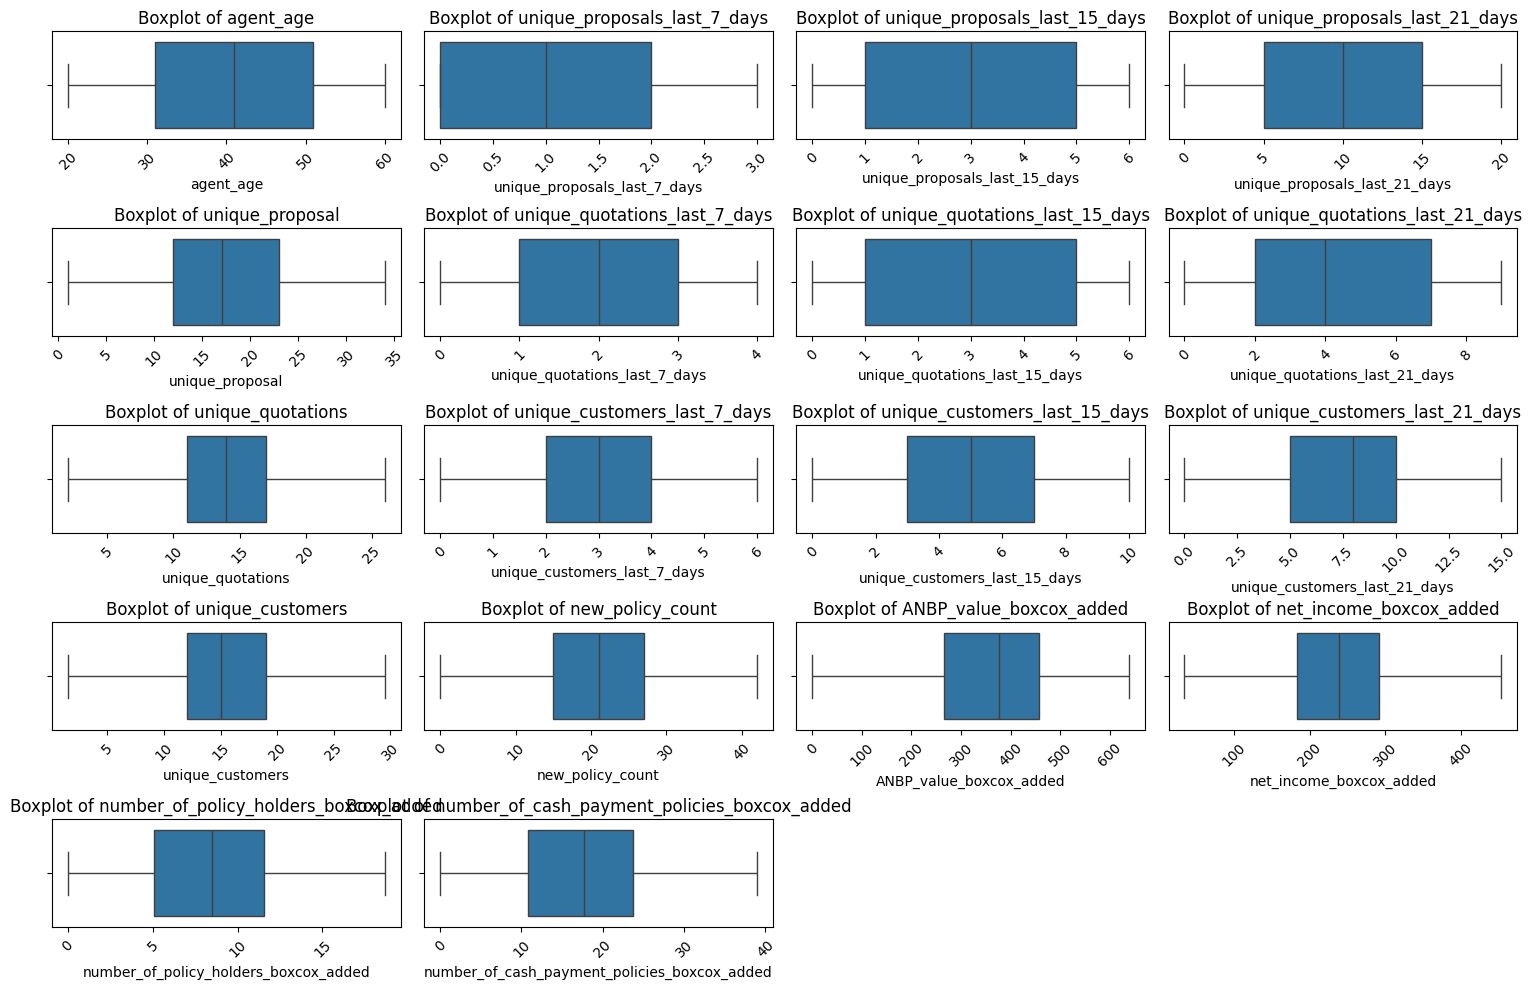

In [233]:
# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)  # Create a grid of 5x4 for the plots
    sns.boxplot(data=train_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Lets see correlation each feature to Target variabler

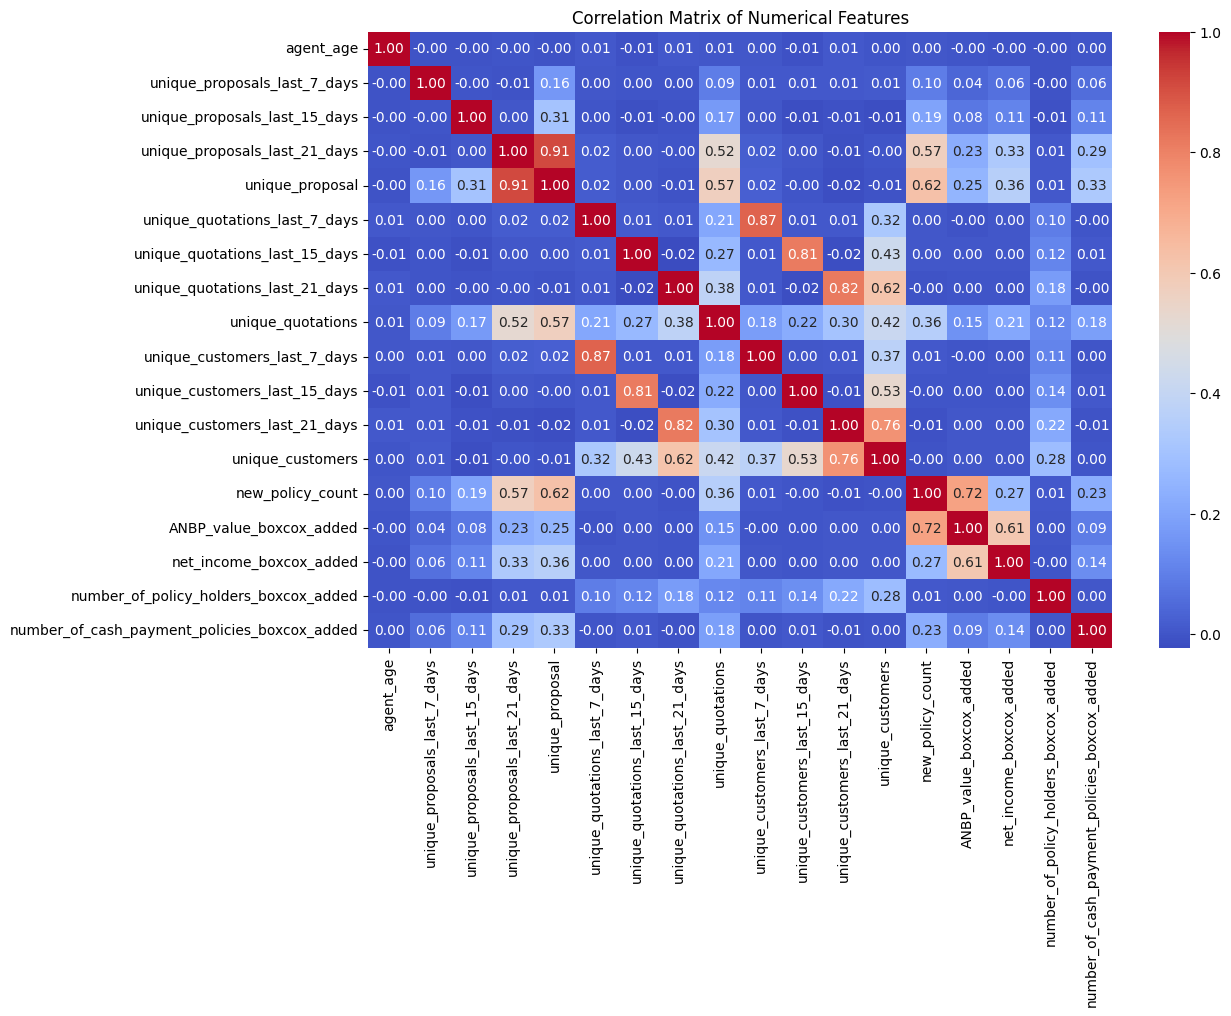

In [234]:
# Correlation matrix for numerical features
correlation_matrix = train_df[numerical_columns].corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

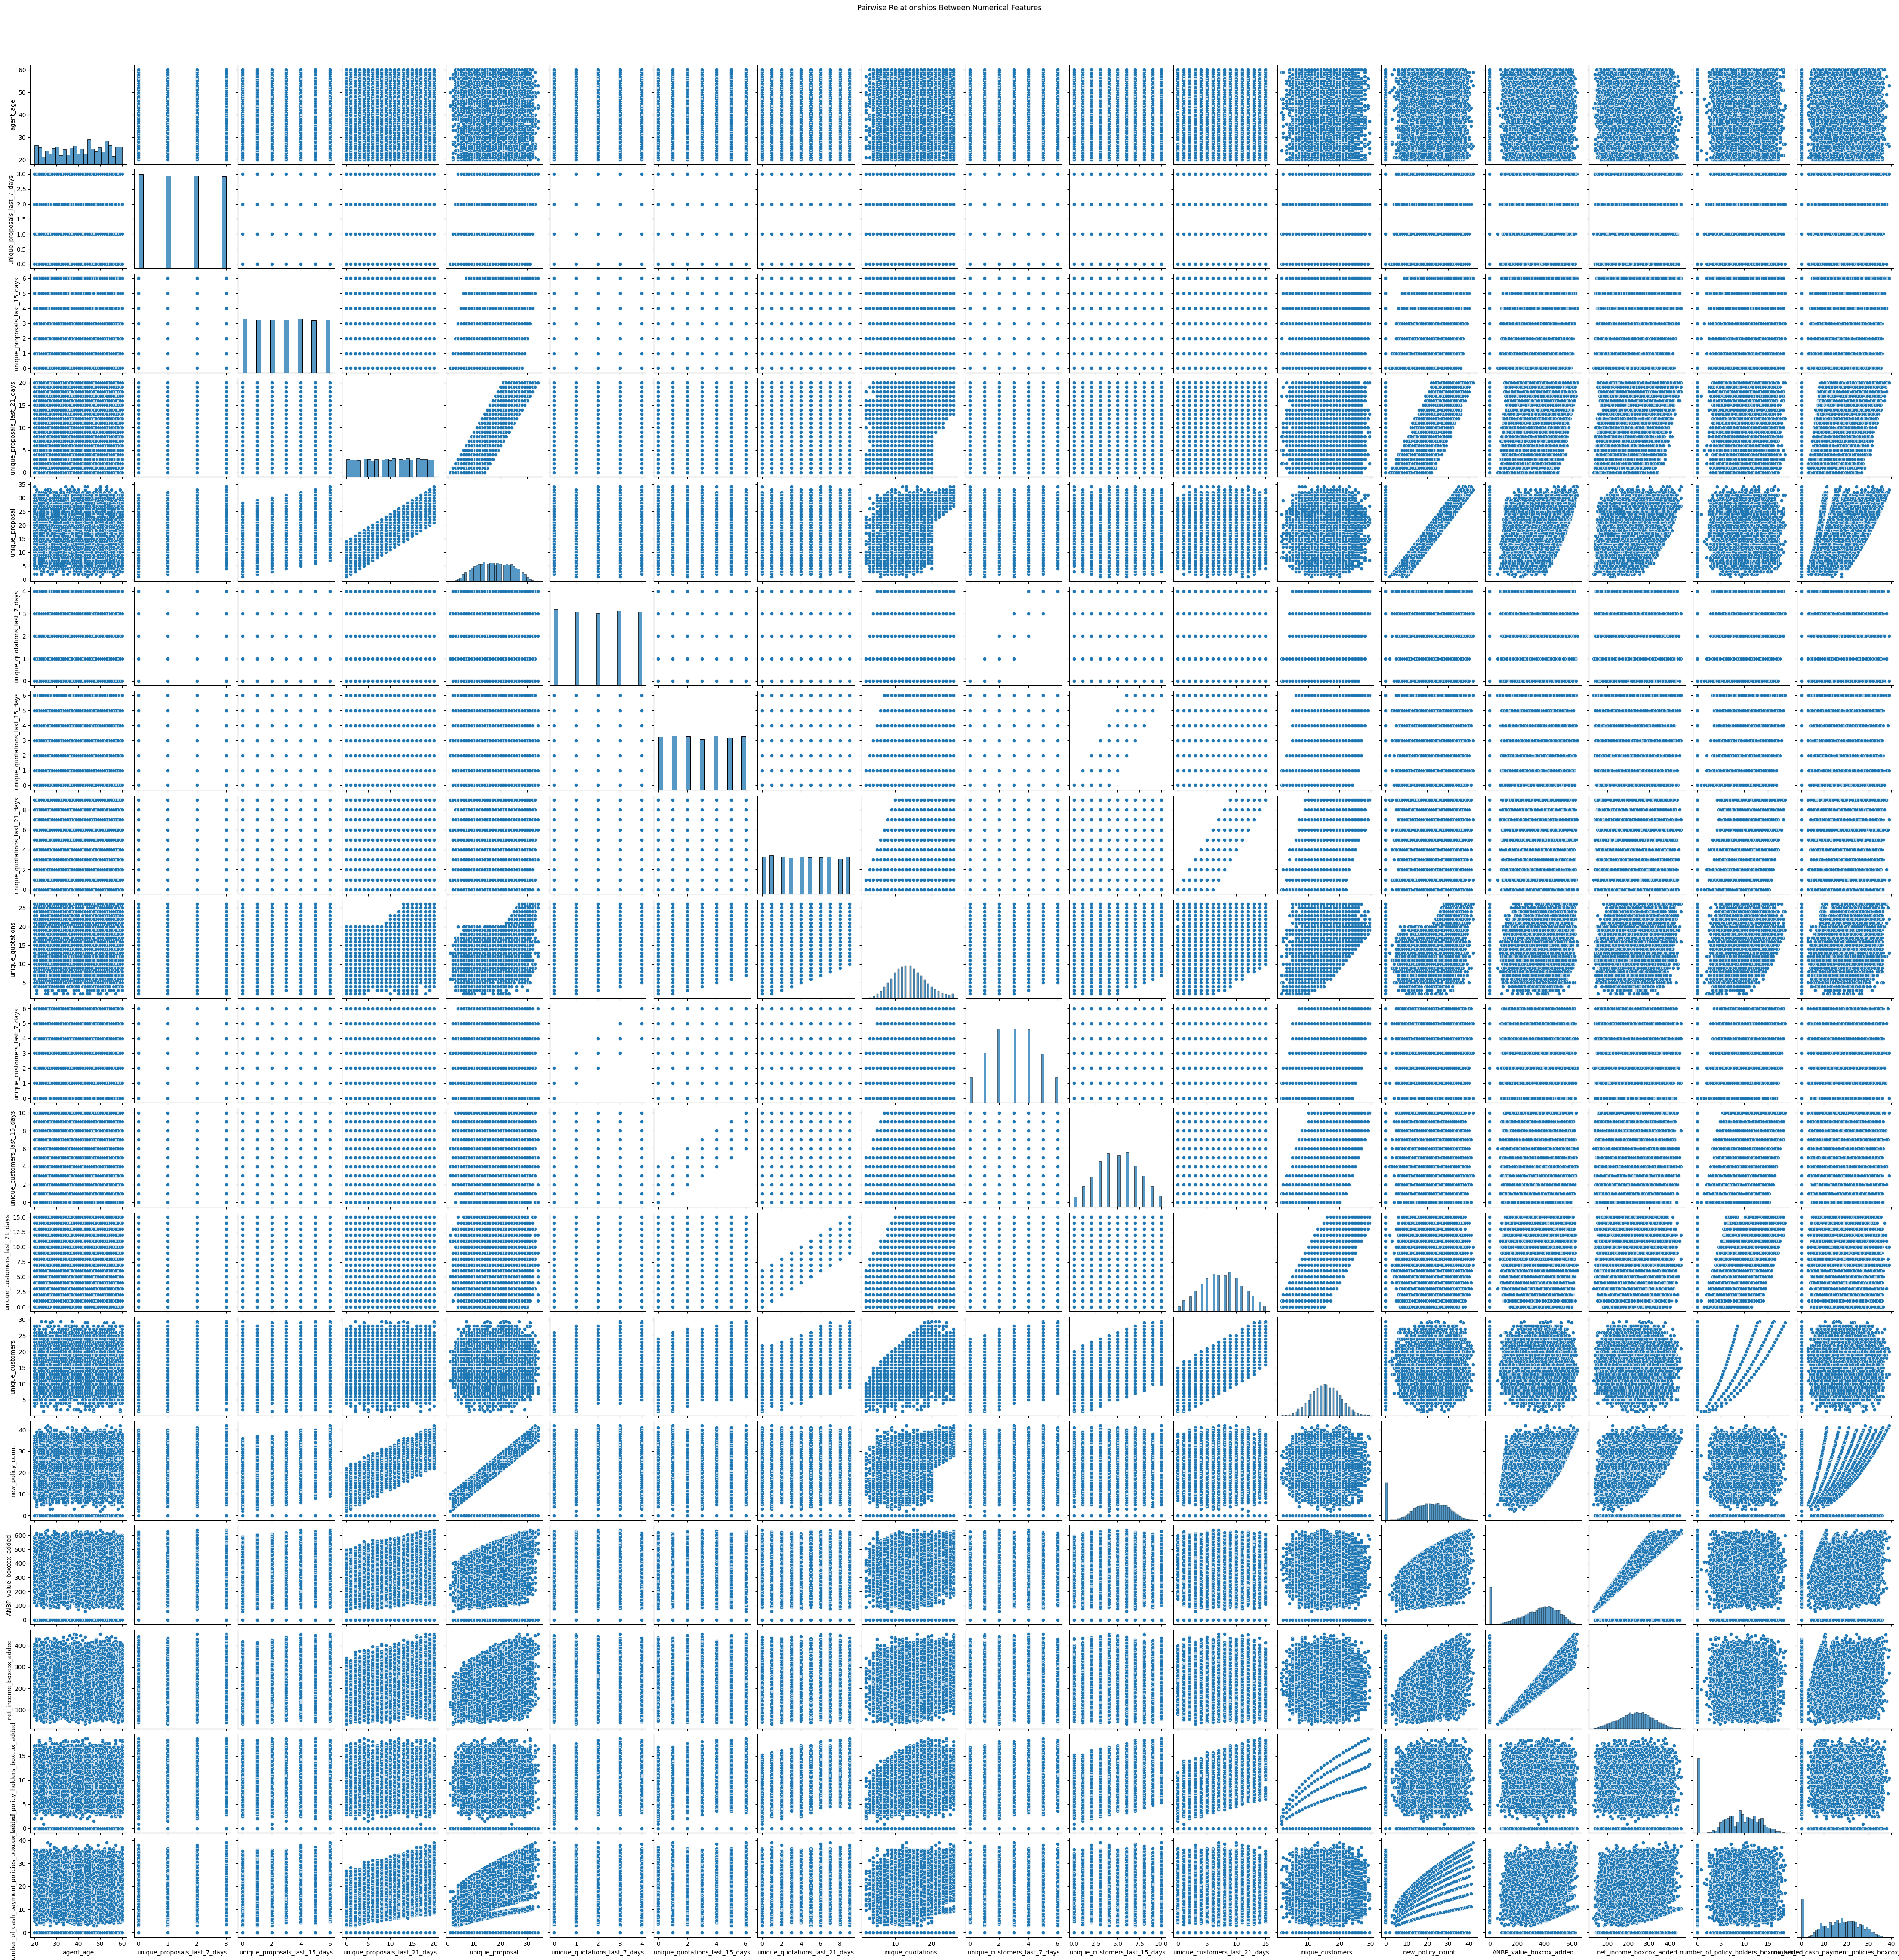

In [235]:
# Pairplot for numerical features
sns.pairplot(train_df[numerical_columns])
plt.suptitle('Pairwise Relationships Between Numerical Features', y=1.02)
plt.show()


In [236]:
# 1. Extract all unique agent IDs into a list
agent_ids = train_df['agent_code'].unique().tolist()

# 2. Select a few agents for plotting (you can select any 2 or 3 agents by agent_code)
selected_agents = agent_ids[:3]  # For example, select the first 3 agents (you can modify this list as needed

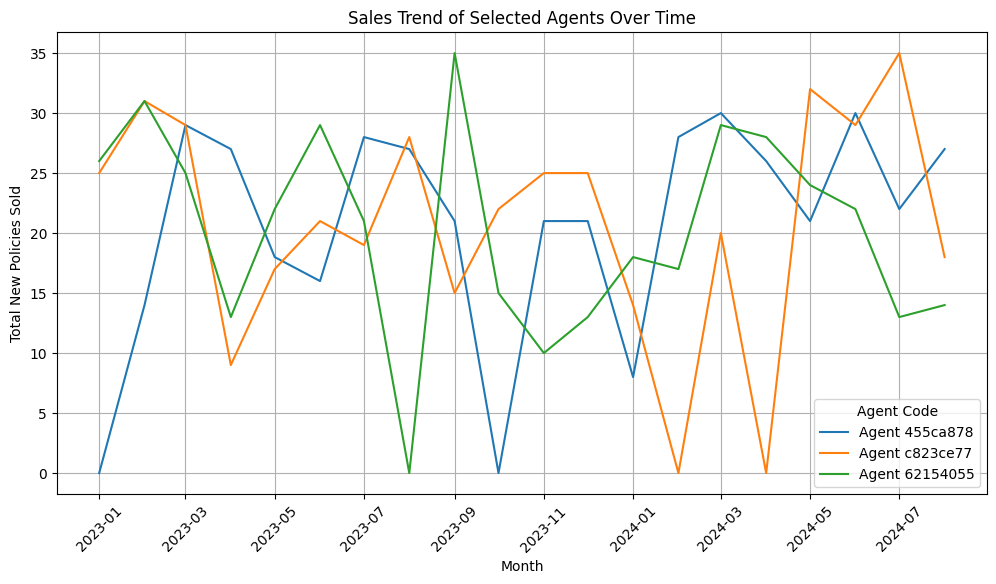

In [237]:
# 3. Filter data for selected agents and track their sales over time
plt.figure(figsize=(12, 6))

for agent in selected_agents:
    # Filter data for the current agent
    agent_data = train_df[train_df['agent_code'] == agent]
    
    # Aggregate sales over time (by month)
    agent_sales = agent_data.groupby('year_month')['new_policy_count'].sum().reset_index()

    # Plot the sales trend for this agent
    plt.plot(agent_sales['year_month'], agent_sales['new_policy_count'], label=f'Agent {agent}')

# 4. Customize the plot
plt.title('Sales Trend of Selected Agents Over Time')
plt.xlabel('Month')
plt.ylabel('Total New Policies Sold')
plt.xticks(rotation=45)
plt.legend(title='Agent Code')
plt.grid(True)
plt.show()

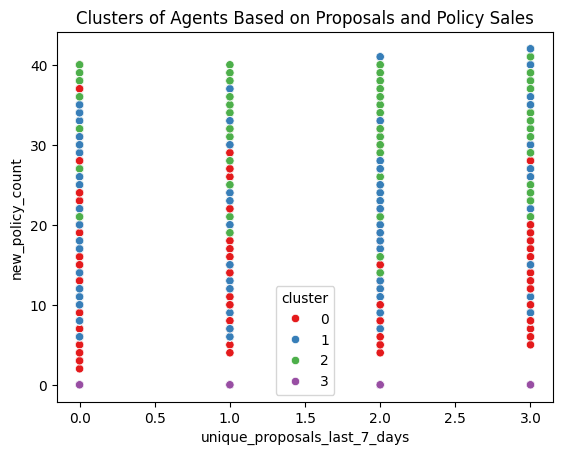

In [238]:
from sklearn.cluster import KMeans

# Example: Applying K-means clustering on selected features
kmeans = KMeans(n_clusters=4, random_state=42)
train_df['cluster'] = kmeans.fit_predict(train_df[numerical_columns])

# Plot clusters based on new_policy_count
sns.scatterplot(x='unique_proposals_last_7_days', y='new_policy_count', hue='cluster', data=train_df, palette='Set1')
plt.title('Clusters of Agents Based on Proposals and Policy Sales')
plt.show()


### Lets do PCA for columsn 

In [239]:
from sklearn.decomposition import PCA

# Create a PCA instance and reduce to 1 component (or 2 if needed)
pca = PCA(n_components=2)

# Apply PCA to the quotations columns
train_df[['pca_quotations_1' ,'pca_quotations_2']] = pca.fit_transform(train_df[['unique_quotations_last_7_days', 'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations']])

# Check the results
print(train_df[['unique_quotations_last_7_days', 'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations', 'pca_quotations_1' , 'pca_quotations_2']].head())


   unique_quotations_last_7_days  unique_quotations_last_15_days  \
0                              3                               0   
1                              3                               1   
2                              1                               6   
3                              1                               1   
4                              3                               6   

   unique_quotations_last_21_days  unique_quotations  pca_quotations_1  \
0                               4                  9         -5.057055   
1                               8                 14          1.010476   
2                               5                 14          0.544772   
3                               5                 11         -2.867246   
4                               2                 13         -1.208268   

   pca_quotations_2  
0          1.619553  
1          3.703646  
2         -0.286545  
3          1.878438  
4         -2.928085  


### Pca column contains Negative values , since we are going with KNN for 8unsupervised , it better to scale 

In [240]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the PCA components
scaler = MinMaxScaler()
train_df[['pca_quotations_1', 'pca_quotations_2']] = scaler.fit_transform(train_df[['pca_quotations_1', 'pca_quotations_2']])

# Check the results
print(train_df[['pca_quotations_1', 'pca_quotations_2']].head())



   pca_quotations_1  pca_quotations_2
0          0.305005          0.683665
1          0.535932          0.828367
2          0.518208          0.551321
3          0.388348          0.701640
4          0.451488          0.367913


 ###  Since  84.88% of the variance is captured by 2 components, we can proceed to use these two new principal components (pca_customers_1 and pca_customers_2) in your model for further analysis or predictions.

In [241]:
# Check the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)


[0.65664732 0.19216522]


### Another data set

In [242]:
# Create a PCA instance and reduce to 1 component (or 2 if needed)
from sklearn.decomposition import PCA

# Apply PCA to the unique customers columns
pca = PCA(n_components=2)

# Apply PCA and store the results in two new columns: pca_customers_1 and pca_customers_2
train_df[['pca_customers_1', 'pca_customers_2']] = pca.fit_transform(train_df[['unique_customers_last_7_days', 'unique_customers_last_15_days', 'unique_customers_last_21_days', 'unique_customers']])

# Check the results
print(train_df[['unique_customers_last_7_days', 'unique_customers_last_15_days', 'unique_customers_last_21_days', 'unique_customers', 'pca_customers_1', 'pca_customers_2']].head())


   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             3                              4   
1                             4                              3   
2                             3                              7   
3                             2                              2   
4                             3                             10   

   unique_customers_last_21_days  unique_customers  pca_customers_1  \
0                              8              15.0        -0.329573   
1                             10              17.0         2.263952   
2                             11              21.0         6.767039   
3                              9              13.0        -1.899018   
4                              6              19.0         3.036061   

   pca_customers_2  
0        -1.157873  
1        -2.580617  
2         0.513425  
3        -3.825496  
4         5.410148  


### Lets make those values positive using minmaxc scaler , cuz , we are using KNN foir unsupervised leaning



In [243]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the PCA components
scaler = MinMaxScaler()
train_df[['pca_customers_1', 'pca_customers_2']] = scaler.fit_transform(train_df[['pca_customers_1', 'pca_customers_2']])

# Check the results
print(train_df[['pca_customers_1', 'pca_customers_2']].head())

   pca_customers_1  pca_customers_2
0         0.488682         0.431759
1         0.566602         0.348196
2         0.701894         0.529921
3         0.441529         0.275080
4         0.589800         0.817523


###  Since 92% of the variance is captured by 2 components, we can proceed to use these two new principal components (pca_customers_1 and pca_customers_2) in your model for further analysis or predictions.

In [244]:
print(pca.explained_variance_ratio_)

[0.73138409 0.18937731]


### For unique Proposal

In [245]:
# Create a PCA instance and reduce to 1 component (or 2 if needed)
from sklearn.decomposition import PCA

# Apply PCA to the unique customers columns
pca = PCA(n_components=2)

# Apply PCA and store the results in two new columns: pca_customers_1 and pca_customers_2
train_df[['pca_proposal_1', 'pca_proposal_2']] = pca.fit_transform(train_df[['unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_proposal']])

# Check the results
print(train_df[['unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_proposal', 'pca_proposal_1', 'pca_proposal_2']].head())


   unique_proposals_last_7_days  unique_proposals_last_15_days  \
0                             3                              6   
1                             1                              4   
2                             3                              5   
3                             1                              0   
4                             0                              6   

   unique_proposals_last_21_days  unique_proposal  pca_proposal_1  \
0                              2               12       -9.333781   
1                             12               21        3.928447   
2                              5               17       -3.658194   
3                             12               17        0.794373   
4                             10               17       -0.306078   

   pca_proposal_2  
0        4.186747  
1        1.157052  
2        4.048731  
3       -3.469136  
4        1.818976  


In [246]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the PCA components
scaler = MinMaxScaler()
train_df[['pca_proposal_1', 'pca_proposal_2']] = scaler.fit_transform(train_df[['pca_proposal_1', 'pca_proposal_2']])

# Check the results
print(train_df[['pca_proposal_1', 'pca_proposal_2']].head())

   pca_proposal_1  pca_proposal_2
0        0.256450        0.842064
1        0.604085        0.593088
2        0.405221        0.830722
3        0.521933        0.212915
4        0.493088        0.647484


###  these two components explain 97.47% of the variance, which is excellent. This indicates that these two components are highly effective at summarizing the data while reducing dimensionality.

In [247]:
print(pca.explained_variance_ratio_)

[0.89997443 0.07483358]


In [248]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   row_id                                        15308 non-null  int64         
 1   agent_code                                    15308 non-null  object        
 2   agent_age                                     15308 non-null  int64         
 3   agent_join_month                              15308 non-null  datetime64[ns]
 4   first_policy_sold_month                       15308 non-null  datetime64[ns]
 5   year_month                                    15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days                  15308 non-null  int64         
 7   unique_proposals_last_15_days                 15308 non-null  int64         
 8   unique_proposals_last_21_days                 15308 non-null  int6

In [249]:
categorical_columns = [
    'agent_code',
    'agent_join_month',
    'first_policy_sold_month',
    'year_month'
]

numerical_columns = [
    'agent_age',
    'pca_proposal_1', 
    'pca_proposal_2',
    'pca_quotations_1', 
    'pca_quotations_2', 
    'pca_customers_1',
    'pca_customers_2',
    'new_policy_count',
    'ANBP_value_boxcox_added',
    'net_income_boxcox_added',
    'number_of_policy_holders_boxcox_added',
    'number_of_cash_payment_policies_boxcox_added'
]

### Date Time Processing

In [250]:
# Calculate agent's seniority (in months)
train_df['agent_seniority'] = (train_df['year_month'].dt.year - train_df['agent_join_month'].dt.year) * 12 + \
                              (train_df['year_month'].dt.month - train_df['agent_join_month'].dt.month)


In [251]:
print(train_df["agent_seniority"])

0        23
1         9
2        32
3        42
4        28
         ..
15303    64
15304    23
15305    43
15306    32
15307    19
Name: agent_seniority, Length: 15308, dtype: int32


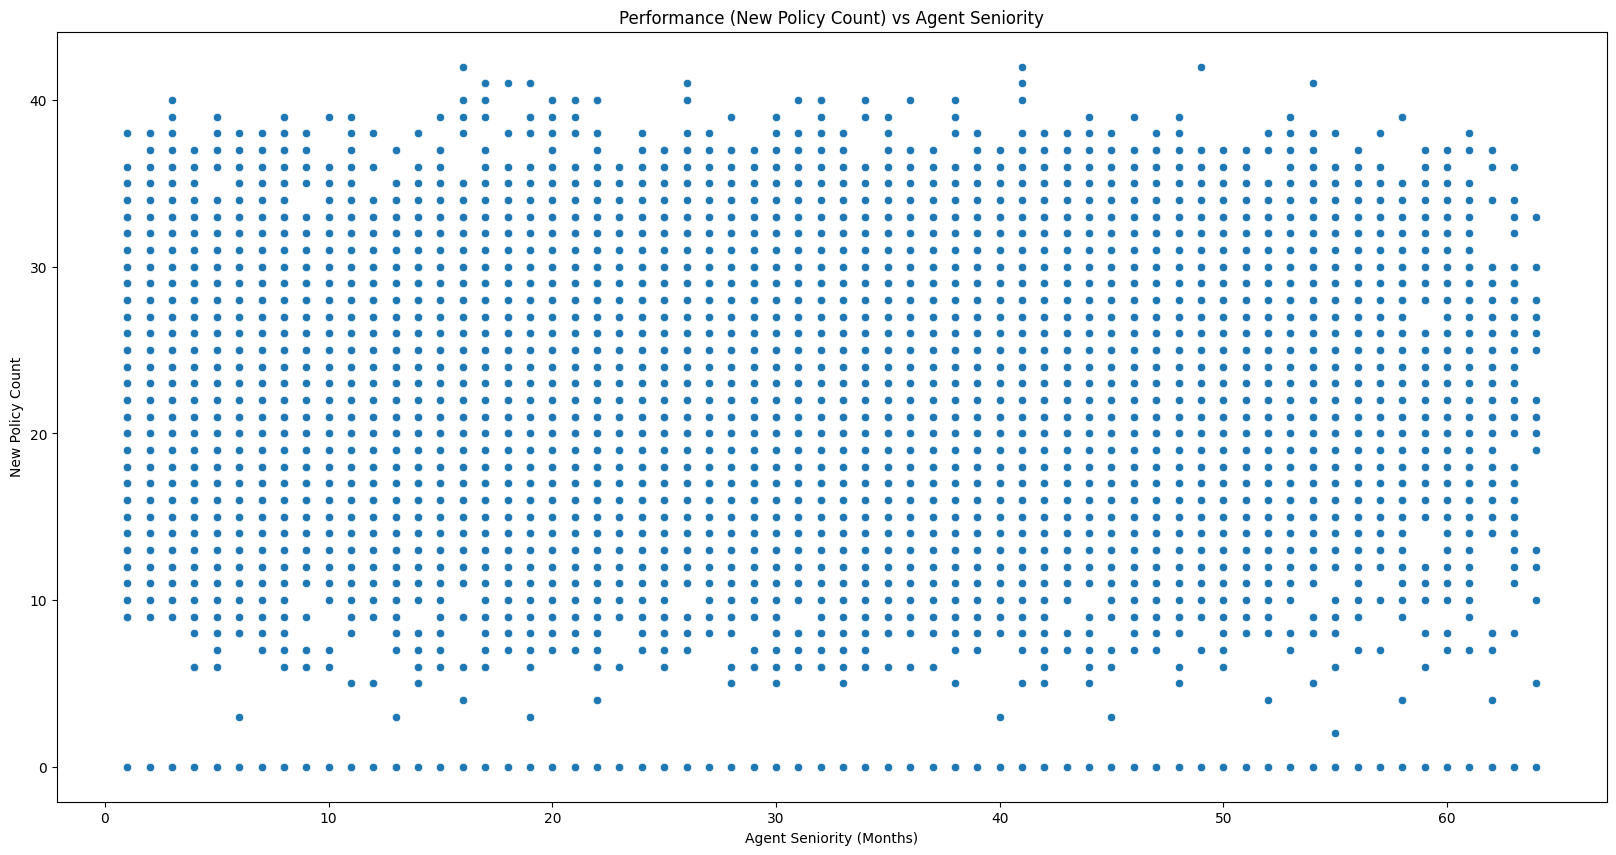

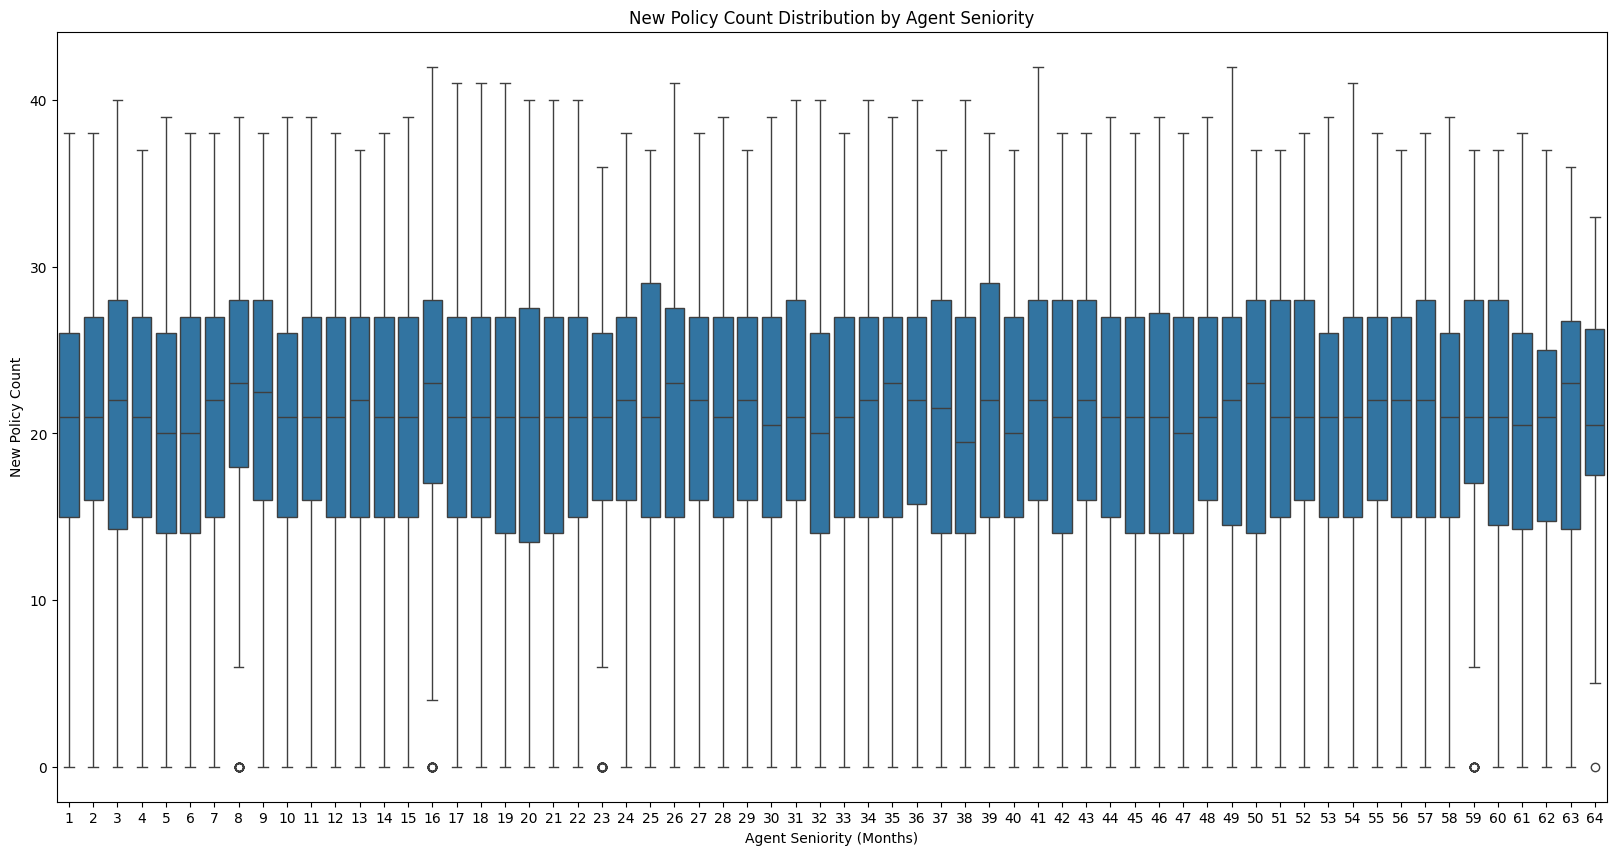

In [252]:

# Scatter plot: Performance vs Agent Seniority (e.g., new_policy_count)
plt.figure(figsize=(20, 10))
sns.scatterplot(x=train_df['agent_seniority'], y=train_df['new_policy_count'])
plt.title('Performance (New Policy Count) vs Agent Seniority')
plt.xlabel('Agent Seniority (Months)')
plt.ylabel('New Policy Count')
plt.show()

# Box plot: Distribution of performance based on agent seniority ranges
plt.figure(figsize=(20, 10))
sns.boxplot(x=train_df['agent_seniority'], y=train_df['new_policy_count'])
plt.title('New Policy Count Distribution by Agent Seniority')
plt.xlabel('Agent Seniority (Months)')
plt.ylabel('New Policy Count')
plt.show()


#### This shows that , based on seniority , new policy count dosent change , Not depend on it p value >0.05

In [253]:
from scipy import stats

# Perform ANOVA to test the difference in 'new_policy_count' across 'agent_seniority' groups
seniority_groups = [train_df[train_df['agent_seniority'] == i]['new_policy_count'] for i in range(1, 65)]
f_stat, p_value = stats.f_oneway(*seniority_groups)
print(f"ANOVA result: F-statistic={f_stat}, p-value={p_value}")


ANOVA result: F-statistic=0.8700427851183148, p-value=0.7587934404029879


### Lets check How long(Months) it took to do first sale for agents 

In [254]:
# train_df["time_to_first_sale"] = (train_df['first_policy_sold_month'] - train_df['agent_join_month']).dt.days


In [255]:
# Calculate time to first sale in months
train_df['time_to_first_sale_months'] = (train_df['first_policy_sold_month'].dt.year - train_df['agent_join_month'].dt.year) * 12 + \
                                          (train_df['first_policy_sold_month'].dt.month - train_df['agent_join_month'].dt.month)

# Display the result
print(train_df[['agent_code', 'agent_join_month', 'first_policy_sold_month', 'time_to_first_sale_months']].head())


  agent_code agent_join_month first_policy_sold_month  \
0   455ca878       2021-02-01              2023-09-01   
1   c823ce77       2022-04-01              2024-02-01   
2   62154055       2020-05-01              2023-09-01   
3   c58bfa6e       2019-07-01              2022-03-01   
4   b1e5f770       2020-09-01              2023-02-01   

   time_to_first_sale_months  
0                         31  
1                         22  
2                         40  
3                         32  
4                         29  


In [256]:
print(train_df["time_to_first_sale_months"])

0        31
1        22
2        40
3        32
4        29
         ..
15303    54
15304    18
15305    39
15306    24
15307    13
Name: time_to_first_sale_months, Length: 15308, dtype: int32


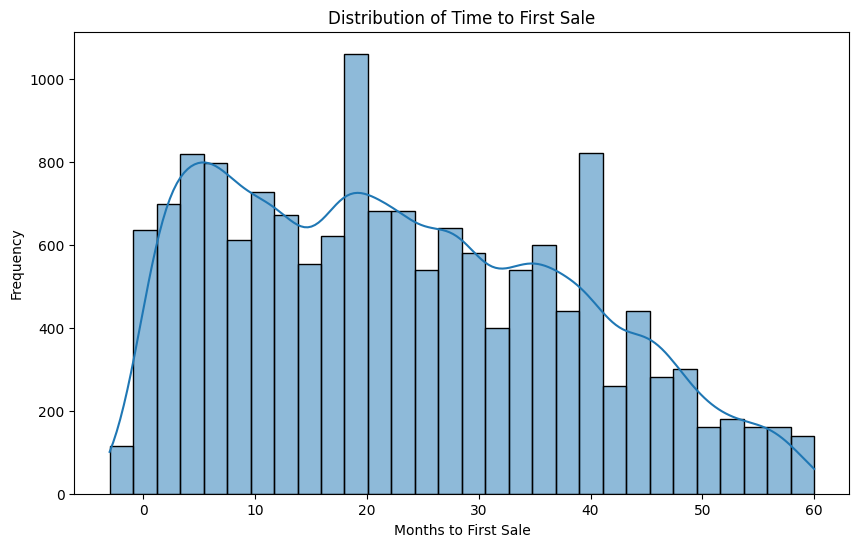

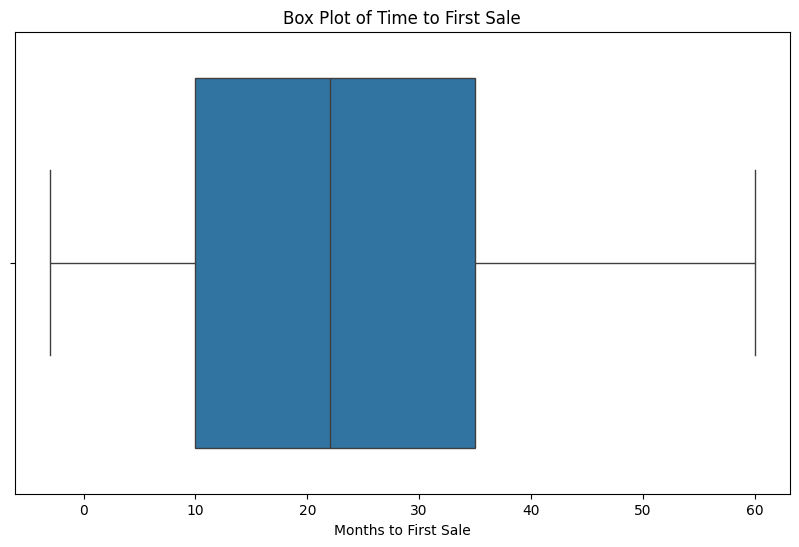

In [257]:
# Plot the distribution of time_to_first_sale
plt.figure(figsize=(10, 6))
sns.histplot(train_df['time_to_first_sale_months'], kde=True, bins=30)
plt.title('Distribution of Time to First Sale')
plt.xlabel('Months to First Sale')
plt.ylabel('Frequency')
plt.show()

# Box plot to see the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['time_to_first_sale_months'])
plt.title('Box Plot of Time to First Sale')
plt.xlabel('Months to First Sale')
plt.show()


since No outliers 

### Lets checek agent perfrormance

In [258]:
# Extract month, quarter, and year from 'year_month'
train_df['month'] = train_df['year_month'].dt.month
train_df['quarter'] = train_df['year_month'].dt.quarter
train_df['year'] = train_df['year_month'].dt.year


In [259]:
# Group by agent_code and year_month to calculate the sum of new_policy_count for each agent in each month
agent_sales_by_month = train_df.groupby(['agent_code', 'year_month'])['new_policy_count'].sum().reset_index()

# Display the result
print(agent_sales_by_month.head())


  agent_code year_month  new_policy_count
0   003c1999 2023-01-01                 0
1   003c1999 2023-02-01                31
2   003c1999 2023-03-01                27
3   003c1999 2023-04-01                22
4   003c1999 2023-05-01                20


In [260]:
# Filter the data for the first agent (agent_code = '003c1999')
first_agent_sales = agent_sales_by_month[agent_sales_by_month['agent_code'] == '003c1999']

# Display all rows for that agent
print(first_agent_sales)


   agent_code year_month  new_policy_count
0    003c1999 2023-01-01                 0
1    003c1999 2023-02-01                31
2    003c1999 2023-03-01                27
3    003c1999 2023-04-01                22
4    003c1999 2023-05-01                20
5    003c1999 2023-06-01                 0
6    003c1999 2023-07-01                14
7    003c1999 2023-08-01                26
8    003c1999 2023-09-01                35
9    003c1999 2023-10-01                35
10   003c1999 2023-11-01                21
11   003c1999 2023-12-01                30
12   003c1999 2024-01-01                18
13   003c1999 2024-02-01                33
14   003c1999 2024-03-01                15
15   003c1999 2024-04-01                19
16   003c1999 2024-05-01                32
17   003c1999 2024-06-01                23
18   003c1999 2024-07-01                28
19   003c1999 2024-08-01                19


### For each agent we can display trend

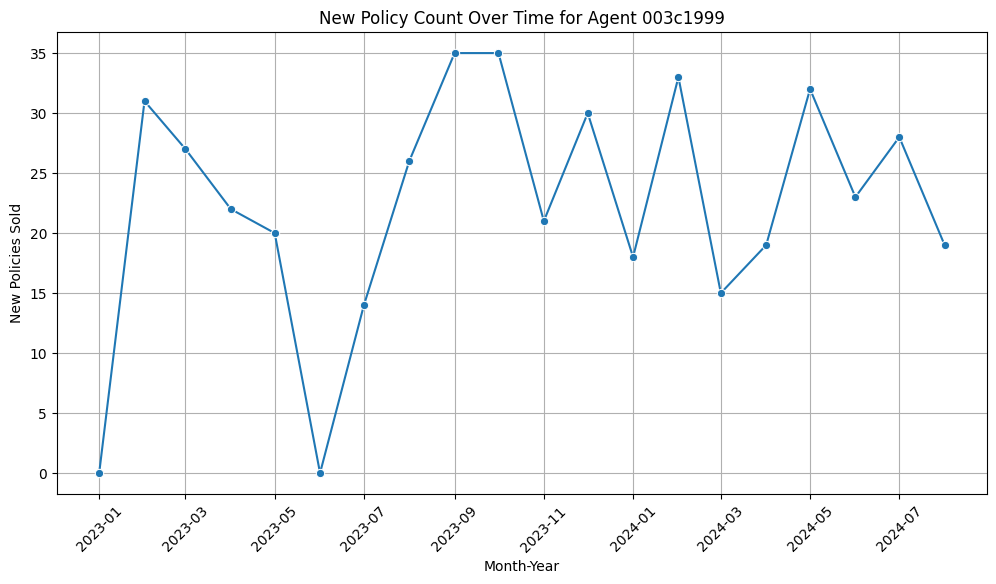

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific agent (agent_code = '003c1999')
agent_data = train_df[train_df['agent_code'] == '003c1999']

# Plot the new_policy_count over time (year_month)
plt.figure(figsize=(12, 6))
sns.lineplot(data=agent_data, x='year_month', y='new_policy_count', marker='o')

# Set plot labels and title
plt.title('New Policy Count Over Time for Agent 003c1999')
plt.xlabel('Month-Year')
plt.ylabel('New Policies Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [262]:

# # Calculate the average number of proposals, quotations, and customers for each agent
# agent_performance = train_df.groupby('agent_code')[['unique_proposals', 'unique_quotations', 'unique_customers', 'new_policy_count']].mean().reset_index()

# # Merge the performance features back into the main dataframe
# train_df = train_df.merge(agent_performance, on='agent_code', suffixes=('', '_avg'))

# # Check the new features
# train_df[['agent_code', 'new_policy_count', 'agent_seniority', 'unique_proposals_avg', 'unique_quotations_avg', 'unique_customers_avg']].head()


### Just for prediction , DELETEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

In [203]:
# Ensure 'new_policy_count' is numeric
train_df['new_policy_count'] = pd.to_numeric(train_df['new_policy_count'], errors='coerce')

# Apply the lambda function to create 'is_null'
train_df['is_null'] = train_df['new_policy_count'].apply(lambda x: 1 if x == 0 else 0)

# Check the result
print(train_df[['new_policy_count', 'is_null']].head())



      new_policy_count  is_null
8                    0        1
958                 31        0
1761                27        0
2577                22        0
2708                20        0


In [204]:
# Check unique values and their counts for the 'is_null' column
unique_counts = train_df['is_null'].value_counts()

# Print the unique values and counts
print(unique_counts)

is_null
0    13778
1     1530
Name: count, dtype: int64


In [209]:
categorical_columns = [
    'agent_code',
    # 'agent_join_month',
    # 'first_policy_sold_month',
    # 'year_month',
    'is_null'
]

numerical_columns = [
    'agent_age',
    'pca_proposal_1', 
    'pca_proposal_2',
    'pca_quotations_1', 
    'pca_quotations_2', 
    'pca_customers_1',
    'pca_customers_2',
    'time_to_first_sale_months',
    # 'new_policy_count',
    'agent_seniority' ,
    'ANBP_value_boxcox_added',
    'net_income_boxcox_added',
    'number_of_policy_holders_boxcox_added',
    'number_of_cash_payment_policies_boxcox_added'
]

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'train_df' is your DataFrame and the target column is 'is_null'

# Step 1: Separate the data by class
class_0 = train_df[train_df['is_null'] == 0]
class_1 = train_df[train_df['is_null'] == 1]

# Step 2: Randomly sample the majority class (class 0) to match the minority class (class 1)
class_0_sampled = class_0.sample(n=len(class_1), random_state=42)

# Step 3: Combine the sampled class 0 with class 1 to create a balanced dataset
balanced_df = pd.concat([class_0_sampled, class_1])

# Step 4: Define the features (X) and target (y)
X = balanced_df[categorical_columns + numerical_columns].copy()

# Convert categorical columns to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['agent_code'], drop_first=True)

# Target variable is 'is_null'
y = balanced_df['is_null']

# Step 5: Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Step 6: Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 9: Classification report for more details
print(classification_report(y_test, y_pred))


(2448, 850) (612, 850) (2448,) (612,)


c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       299

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming train_df is your DataFrame

# 1. Define the features (X) and target (y)
X = train_df[categorical_columns + numerical_columns].copy()

# 2. Convert categorical columns to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month'], drop_first=True)

# Target variable is 'is_null'
y = train_df['is_null']

# 3. Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [199]:
# 4. Apply SMOTE to balance the training data (oversample the minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new shape after resampling
print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")

# 5. Train an XGBoost model on the resampled data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 6. Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 8. Classification report for more details
print(classification_report(y_test, y_pred))

Original training set shape: (12246, 1028)
Resampled training set shape: (22054, 1028)


c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:49:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2751
           1       1.00      1.00      1.00       311

    accuracy                           1.00      3062
   macro avg       1.00      1.00      1.00      3062
weighted avg       1.00      1.00      1.00      3062



In [200]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean()}')


c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:49:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:49:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:49:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: 

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming train_df is your DataFrame and categorical_columns + numerical_columns are defined

# 1. Define the features (X) and target (y)
X = train_df[categorical_columns + numerical_columns].copy()

# 2. Convert categorical columns to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month'], drop_first=True)

# Target variable is 'is_null'
y = train_df['is_null']

# 3. Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f'Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}')
print(f'Test set shape: X_test = {X_test.shape}, y_test = {y_test.shape}')


Training set shape: X_train = (12246, 1028), y_train = (12246,)
Test set shape: X_test = (3062, 1028), y_test = (3062,)


In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming train_df is your DataFrame

# 1. Define the features (X) and target (y)
X = train_df[categorical_columns + numerical_columns].copy()

# 2. Convert categorical columns to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month'], drop_first=True)

# Target variable is 'is_null'
y = train_df['is_null']

# 3. Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(12246, 1028) (3062, 1028) (12246,) (3062,)


In [196]:
# 4. Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 7. Classification report for more details
print(classification_report(y_test, y_pred))


c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2751
           1       1.00      1.00      1.00       311

    accuracy                           1.00      3062
   macro avg       1.00      1.00      1.00      3062
weighted avg       1.00      1.00      1.00      3062



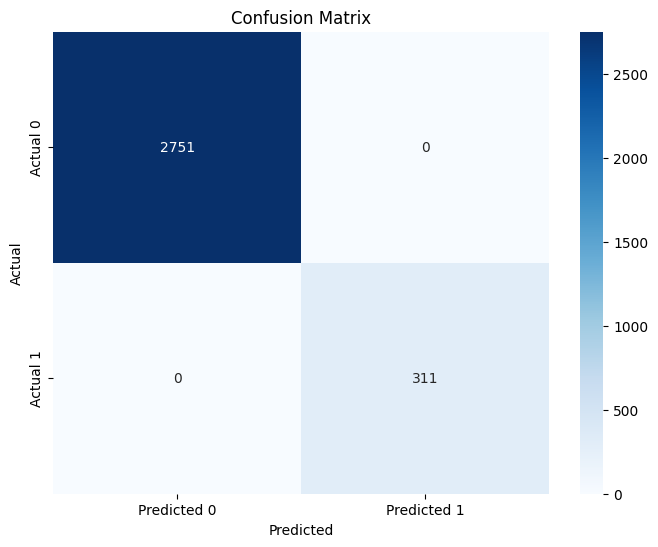

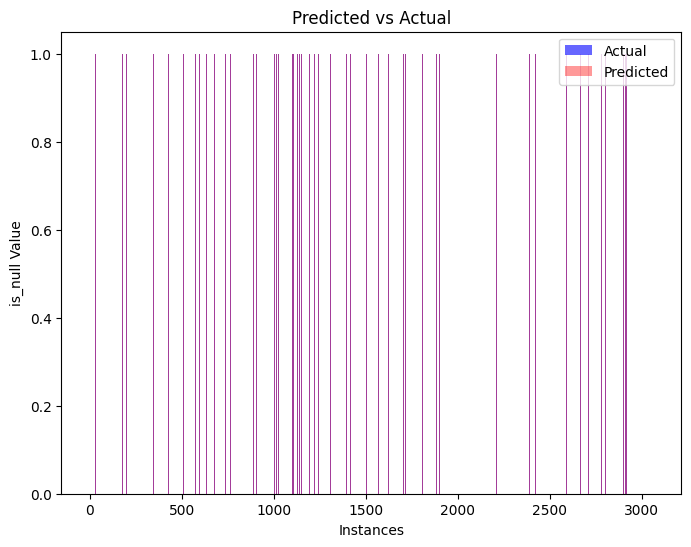

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2751
           1       1.00      1.00      1.00       311

    accuracy                           1.00      3062
   macro avg       1.00      1.00      1.00      3062
weighted avg       1.00      1.00      1.00      3062



In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 3: Plot Predicted vs Actual values (bar plot)
plt.figure(figsize=(8, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.6, label='Actual', color='blue')
plt.bar(range(len(y_pred)), y_pred, alpha=0.4, label='Predicted', color='red')
plt.title('Predicted vs Actual')
plt.xlabel('Instances')
plt.ylabel('is_null Value')
plt.legend()
plt.show()

# Step 4: Print the classification report
print(classification_report(y_test, y_pred))


In [193]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')


c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:43:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:43:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:43:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: 

array([1., 1., 1., 1., 1.])

is_null
0    13778
1     1530
Name: count, dtype: int64


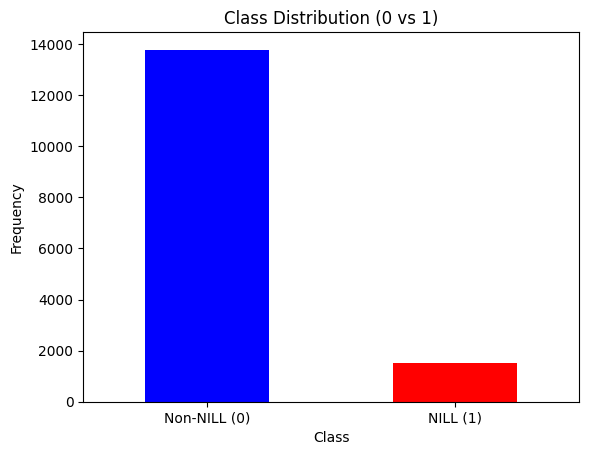

In [194]:
# Check the distribution of the target variable (class 0 vs class 1)
class_distribution = y.value_counts()
print(class_distribution)

# Visualize the distribution with a bar plot
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution (0 vs 1)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-NILL (0)', 'NILL (1)'], rotation=0)
plt.show()
